# MNIST v3

In [1]:
import itertools
import random
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

random_seed = 20181401
random.seed(random_seed)
np.random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [2]:
total_epochs = 20
batch_size = 32
mnist_train = datasets.MNIST(root="datasets/", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = datasets.MNIST(root="datasets/", train=False, transform=transforms.ToTensor(), download=True)
mnist_train_dataloader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True, drop_last=True)
mnist_test_dataloader = DataLoader(mnist_test, batch_size=batch_size)

print("X:", mnist_train.data.shape)
print("Y:", mnist_train.targets.shape)

X: torch.Size([60000, 28, 28])
Y: torch.Size([60000])


In [3]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Sequential(nn.Linear(784, 512), nn.BatchNorm1d(512), nn.ReLU(), nn.Dropout(0.5))
    self.layer2 = nn.Sequential(nn.Linear(512, 512), nn.BatchNorm1d(512), nn.ReLU(), nn.Dropout(0.5))
    self.layer3 = nn.Sequential(nn.Linear(512, 256), nn.BatchNorm1d(256), nn.ReLU(), nn.Dropout(0.5))
    self.layer4 = nn.Sequential(nn.Linear(256, 256), nn.BatchNorm1d(256), nn.ReLU(), nn.Dropout(0.5))
    self.layer5 = nn.Sequential(nn.Linear(256, 10), nn.LogSoftmax(dim=1))
    nn.init.xavier_uniform_(self.layer1[0].weight)
    nn.init.xavier_uniform_(self.layer2[0].weight)
    nn.init.xavier_uniform_(self.layer3[0].weight)
    nn.init.xavier_uniform_(self.layer4[0].weight)
    nn.init.xavier_uniform_(self.layer5[0].weight)

  def forward(self, x):
    return (
      self.layer5(
        self.layer4(
          self.layer3(
            self.layer2(
              self.layer1(
                x
              )
            )
          )
        )
      )
    )

In [4]:
model = MnistModel().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [5]:
def calculate_accurancy():
  with torch.no_grad():
    model.eval()
    accurancy = 0
    batch_count = len(mnist_test_dataloader)

    for x, y in mnist_test_dataloader:
      assert isinstance(x, torch.Tensor)
      assert isinstance(y, torch.Tensor)
      x = x.view(-1, 784).to(device)
      y = y.to(device)

      hypothesis = model(x)
      prediction = hypothesis.argmax(dim=1)
      correct_prediction = (prediction == y)
      accurancy += correct_prediction.float().mean().item() / batch_count
  
    return accurancy

In [6]:
print("epoch =", 0, "/", "accurancy = {:.3f}%".format(calculate_accurancy() * 100))

for epoch in range(total_epochs):
  model.train()
  avg_cost = 0
  batch_count = len(mnist_train_dataloader)

  for x, y in mnist_train_dataloader:
    assert isinstance(x, torch.Tensor)
    assert isinstance(y, torch.Tensor)
    x = x.view(-1, 784).to(device)
    y = y.to(device)

    hypothesis = model(x)
    cost = nn.functional.nll_loss(hypothesis, y)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    avg_cost += cost.item() / batch_count
  
  print("epoch =", (epoch + 1), "/", "cost =", avg_cost, "/", "accurancy = {:.3f}%".format(calculate_accurancy() * 100))

epoch = 0 / accurancy = 8.676%
epoch = 1 / cost = 0.5677710760156318 / accurancy = 95.657%
epoch = 2 / cost = 0.2977903052399554 / accurancy = 96.615%
epoch = 3 / cost = 0.24153516249756027 / accurancy = 97.105%
epoch = 4 / cost = 0.2144083989943071 / accurancy = 97.384%
epoch = 5 / cost = 0.19315847204277906 / accurancy = 97.724%
epoch = 6 / cost = 0.17155162186225217 / accurancy = 97.804%
epoch = 7 / cost = 0.1607870256155729 / accurancy = 97.644%
epoch = 8 / cost = 0.15518083624318205 / accurancy = 98.093%
epoch = 9 / cost = 0.14381696181359407 / accurancy = 98.073%
epoch = 10 / cost = 0.13626026794935248 / accurancy = 98.263%
epoch = 11 / cost = 0.12671458934495824 / accurancy = 98.233%
epoch = 12 / cost = 0.12291281660074997 / accurancy = 98.303%
epoch = 13 / cost = 0.11498236393618101 / accurancy = 98.313%
epoch = 14 / cost = 0.11296979419365524 / accurancy = 98.383%
epoch = 15 / cost = 0.1088005841785422 / accurancy = 98.413%
epoch = 16 / cost = 0.10609945170568956 / accurancy =

Label: 3
Prediction: 3 (100.000%)


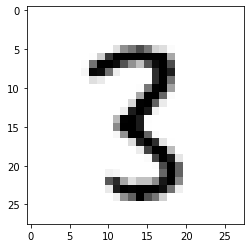

Label: 9
Prediction: 9 (99.981%)


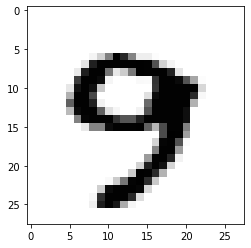

Label: 9
Prediction: 9 (100.000%)


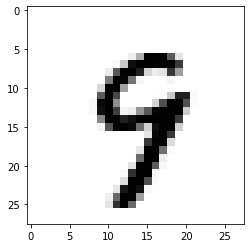

Label: 2
Prediction: 2 (99.978%)


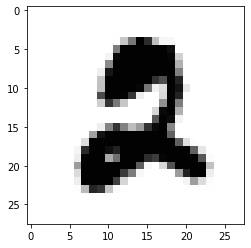

Label: 1
Prediction: 1 (100.000%)


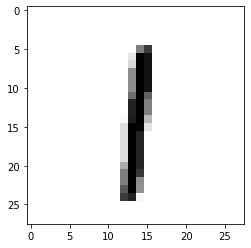

Label: 8
Prediction: 8 (99.999%)


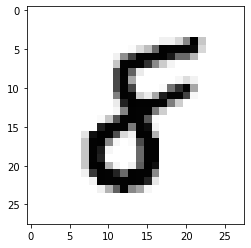

Label: 5
Prediction: 5 (99.996%)


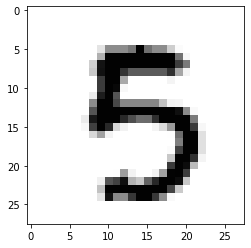

Label: 7
Prediction: 7 (99.993%)


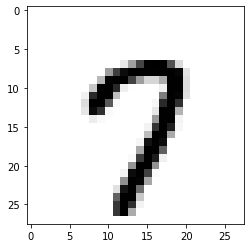

Label: 6
Prediction: 6 (100.000%)


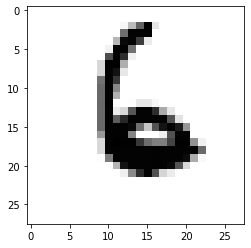

Label: 3
Prediction: 3 (83.656%)


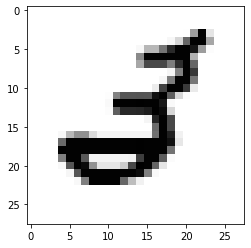

Label: 2
Prediction: 2 (99.435%)


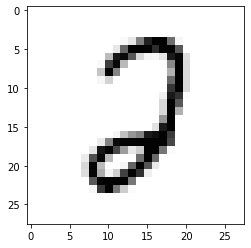

Label: 8
Prediction: 8 (99.974%)


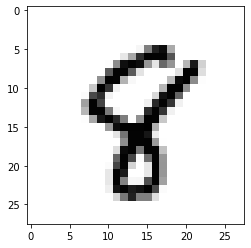

Label: 7
Prediction: 7 (99.995%)


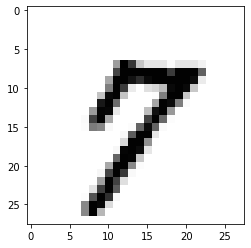

Label: 9
Prediction: 9 (79.818%)


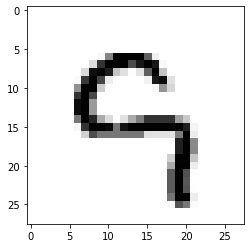

Label: 5
Prediction: 5 (99.969%)


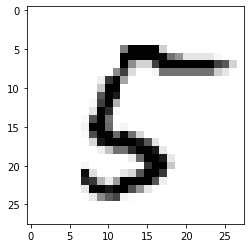

Label: 3
Prediction: 3 (100.000%)


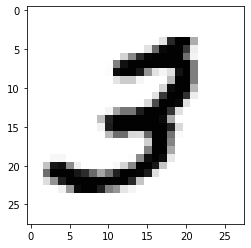

Label: 9
Prediction: 9 (99.979%)


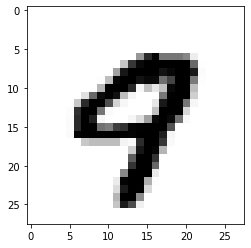

Label: 2
Prediction: 2 (99.748%)


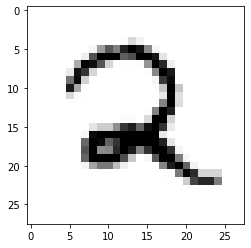

Label: 7
Prediction: 7 (99.998%)


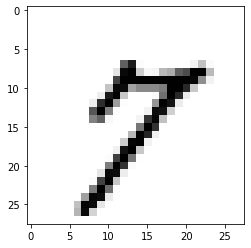

Label: 7
Prediction: 7 (99.998%)


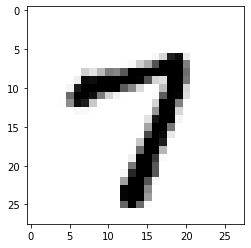

In [7]:
with torch.no_grad():
  model.eval()
  
  for x, y in itertools.islice(DataLoader(mnist_test, batch_size=1, shuffle=True), 20):
    assert isinstance(x, torch.Tensor)
    assert isinstance(y, torch.Tensor)
    x = x.view(-1, 28 * 28).to(device)
    y = y.to(device)

    hypothesis = model(x)
    prediction = hypothesis.argmax(dim=1).item()
    prediction_percent = hypothesis.max(dim=1)[0].exp().item() * 100

    print("Label:", y.item())
    print("Prediction:", prediction, "({:.3f}%)".format(prediction_percent))
    plt.imshow(x.cpu().view(28, 28), cmap=plt.cm.Greys, interpolation="nearest")
    plt.show()